## Imports

In [1]:
import numpy as np
import platform
import tempfile
import os
import matplotlib.pyplot as plt
from scipy import ndimage as ndi
from skimage import io as skio

import skimage
import skimage.morphology as morpho  
import skimage.feature as skf
from scipy import ndimage as ndi

## Useful functions

In [2]:
def viewimage(im,normalise=True,MINI=0.0, MAXI=255.0):
    """ Cette fonction fait afficher l'image EN NIVEAUX DE GRIS 
        dans gimp. Si un gimp est deja ouvert il est utilise.
        Par defaut normalise=True. Et dans ce cas l'image est normalisee 
        entre 0 et 255 avant d'être sauvegardee.
        Si normalise=False MINI et MAXI seront mis a 0 et 255 dans l'image resultat
        
    """
    imt=np.float32(im.copy())
    if platform.system()=='Darwin': #on est sous mac
        prephrase='open -a GIMP '
        endphrase=' ' 
    elif platform.system()=='Linux': #SINON ON SUPPOSE LINUX (si vous avez un windows je ne sais comment faire. Si vous savez dites-moi.)
        prephrase='gimp '
        endphrase= ' &'
    elif platform.system()=='Windows':
        prephrase='start /B "D:/GIMP/bin/gimp-2.10.exe" -a '#Remplacer D:/... par le chemin de votre GIMP
        endphrase= ''
    else:
        print('Systeme non pris en charge par l affichage GIMP')
        return 'erreur d afficahge'
    if normalise:
        m=imt.min()
        imt=imt-m
        M=imt.max()
        if M>0:
            imt=imt/M

    else:
        imt=(imt-MINI)/(MAXI-MINI)
        imt[imt<0]=0
        imt[imt>1]=1
    
    nomfichier=tempfile.mktemp('TPIMA.png')
    commande=prephrase +nomfichier+endphrase
    skio.imsave(nomfichier,imt)
    os.system(commande)


def viewimage_color(im,normalise=True,MINI=0.0, MAXI=255.0):
    """ Cette fonction fait afficher l'image EN NIVEAUX DE GRIS 
        dans gimp. Si un gimp est deja ouvert il est utilise.
        Par defaut normalise=True. Et dans ce cas l'image est normalisee 
        entre 0 et 255 avant d'être sauvegardee.
        Si normalise=False MINI(defaut 0) et MAXI (defaut 255) seront mis a 0 et 255 dans l'image resultat
        
    """
    imt=np.float32(im.copy())
    if platform.system()=='Darwin': #on est sous mac
        prephrase='open -a GIMP '
        endphrase=' ' 
    elif platform.system()=='Linux': #SINON ON SUPPOSE LINUX (si vous avez un windows je ne sais comment faire. Si vous savez dites-moi.)
        prephrase='gimp '
        endphrase= ' &'
    elif platform.system()=='Windows':
        prephrase='start /B "D:/GIMP/bin/gimp-2.10.exe" -a '#Remplacer D:/... par le chemin de votre GIMP
        endphrase= ''
    else:
        print('Systeme non pris en charge par l affichage GIMP')
        return 'erreur d afficahge'
    
    if normalise:
        m=imt.min()
        imt=imt-m
        M=imt.max()
        if M>0:
            imt=imt/M
    else:
        imt=(imt-MINI)/(MAXI-MINI)
        imt[imt<0]=0
        imt[imt>1]=1
    
    nomfichier=tempfile.mktemp('TPIMA.pgm')
    commande=prephrase +nomfichier+endphrase
    skio.imsave(nomfichier,imt)
    os.system(commande)


def strel(forme,taille,angle=45):
    """renvoie un element structurant de forme  
     'diamond'  boule de la norme 1 fermee de rayon taille
     'disk'     boule de la norme 2 fermee de rayon taille
     'square'   carre de cote taille (il vaut mieux utiliser taille=impair)
     'line'     segment de langueur taille et d'orientation angle (entre 0 et 180 en degres)
      (Cette fonction n'est pas standard dans python)
    """

    if forme == 'diamond':
        return morpho.diamond(taille)
    if forme == 'disk':
        return morpho.disk(taille)
    if forme == 'square':
        return morpho.square(taille)
    if forme == 'line':
        angle=int(-np.round(angle))
        angle=angle%180
        angle=np.float32(angle)/180.0*np.pi
        x=int(np.round(np.cos(angle)*taille))
        y=int(np.round(np.sin(angle)*taille))
        if x**2+y**2 == 0:
            if abs(np.cos(angle))>abs(np.sin(angle)):
                x=int(np.sign(np.cos(angle)))
                y=0
            else:
                y=int(np.sign(np.sin(angle)))
                x=0
        rr,cc=skimage.draw.line(0,0,y,x)
        rr=rr-rr.min()
        cc=cc-cc.min()
        img=np.zeros((rr.max()+1,cc.max()+1) )
        img[rr,cc]=1
        return img
    raise RuntimeError('Erreur dans fonction strel: forme incomprise')

            

def couleurs_alea(im):
    """ 
    Donne des couleurs aleatoires a une image en niveau de gris.
    Cette fonction est utile lorsque le niveua de gris d'interprete comme un numero
      de region. Ou encore pour voir les leger degrades d'une teinte de gris.
      """
    sh=im.shape
    out=np.zeros((sh[0],sh[1],3),dtype=np.uint8)
    nbcoul=np.int32(im.max())
    tabcoul=np.random.randint(0,256,size=(nbcoul+1,3))
    tabcoul[0,:]=0
    for k in range(sh[0]):
        for l in range(sh[1]):
            out[k,l,:]=tabcoul[im[k,l]]
    return out

def gris_depuis_couleur(im):
    """ Transforme une image couleur en image a niveaux de gris"""
    return im[:,:,:3].sum(axis=2)/3
    


## Examples of functions for this work

Text(0.5, 1.0, 'Closing')

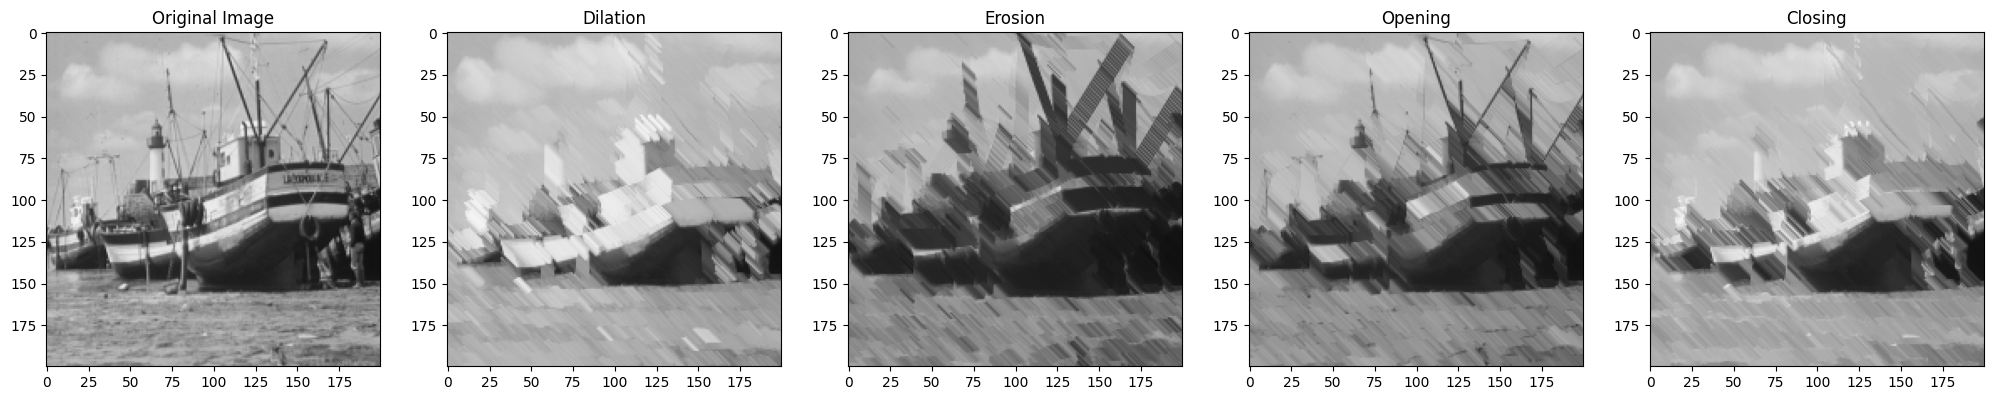

In [3]:
# Binary images 
#im=skio.imread('cellbin.bmp')
#im=skio.imread('cafe.bmp')

# Gray-scale images
#im = skio.imread('Images/retina2.gif')
#im=skio.imread('Images/retina2.gif')
im=skio.imread('Images/bat200.bmp')
#im=skio.imread('Images/bulles.bmp')
#im=gris_depuis_couleur (skio.imread('Images/cailloux.png'))
#im=gris_depuis_couleur(skio.imread('Images/cailloux2.png'))
#im=skio.imread('Images/laiton.bmp')

fig, axs = plt.subplots(1, 5, figsize = (25, 25))

# Original image
axs[0].imshow(im, cmap = 'gray', vmin = 0, vmax = 255)
axs[0].set_title('Original Image')

# Structuring element
se = strel('line', 10, -45)

# dilation
dil=morpho.dilation(im,se)
axs[1].imshow(dil,cmap="gray", vmin = 0, vmax = 255)
axs[1].set_title('Dilation')

# erosion
ero=morpho.erosion(im,se)
axs[2].imshow(ero,cmap="gray", vmin = 0, vmax = 255)
axs[2].set_title('Erosion')

#opening
opening=morpho.opening(im,se)
axs[3].imshow(opening,cmap="gray", vmin = 0, vmax = 255)
axs[3].set_title('Opening')

#closing
close=morpho.closing(im,se)
axs[4].imshow(close,cmap="gray", vmin = 0, vmax = 255)
axs[4].set_title('Closing')

## Successive dilations

Text(0.5, 1.0, 'Difference')

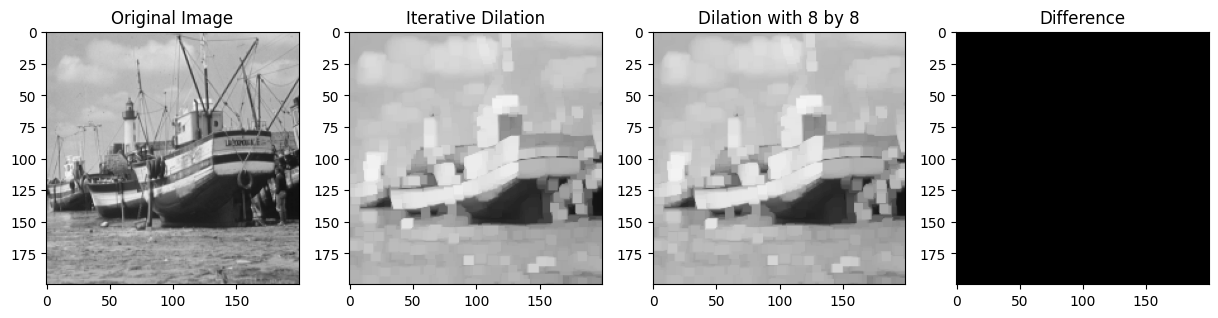

In [4]:
fig, axs = plt.subplots(1, 4, figsize = (15, 15))

# Structuring element
se1=strel('square', 3)
se2 = strel('square', 5)
se3 = strel('square', 7)

# Successive dilations
dilation_1 = morpho.dilation(im,se1)
dilation_2 = morpho.dilation(dilation_1, se2)

# One dilation
dilation_3 = morpho.dilation(im, se3)

axs[0].imshow(im, cmap="gray", vmin = 0, vmax = 255)
axs[0].set_title('Original Image')

axs[1].imshow(dilation_2, cmap="gray", vmin = 0, vmax = 255)
axs[1].set_title('Iterative Dilation')

axs[2].imshow(dilation_3, cmap="gray", vmin = 0, vmax = 255)
axs[2].set_title('Dilation with 8 by 8')

axs[3].imshow(dilation_3 - dilation_2, cmap="gray", vmin = 0, vmax = 255)
axs[3].set_title('Difference')

## Successive openings

Text(0.5, 1.0, 'Difference')

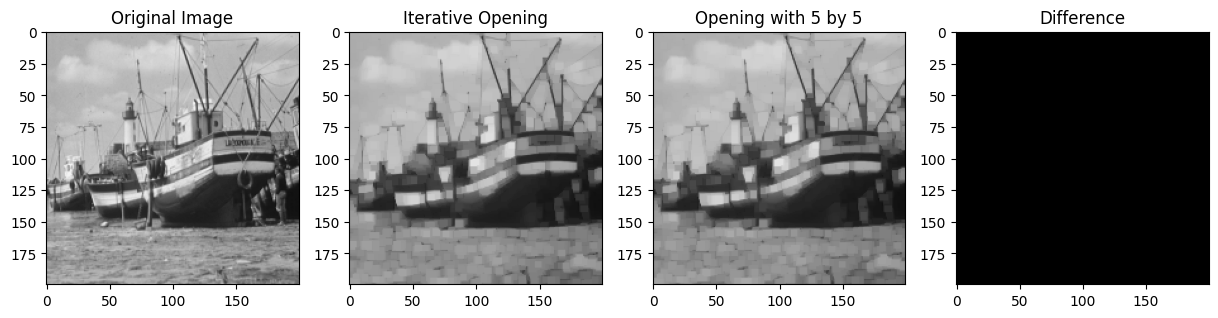

In [5]:
fig, axs = plt.subplots(1, 4, figsize = (15, 15))

# Successive openings
opening_1 = morpho.opening(im,se1)
opening_2 = morpho.opening(opening_1, se2)

# One dilation
opening_3 = morpho.opening(im, se2)

axs[0].imshow(im, cmap="gray", vmin = 0, vmax = 255)
axs[0].set_title('Original Image')

axs[1].imshow(opening_2, cmap="gray", vmin = 0, vmax = 255)
axs[1].set_title('Iterative Opening')

axs[2].imshow(opening_3, cmap="gray", vmin = 0, vmax = 255)
axs[2].set_title('Opening with 5 by 5')

axs[3].imshow(opening_3 - opening_2, cmap="gray", vmin = 0, vmax = 255)
axs[3].set_title('Difference')

## Top-hat transform

Text(0.5, 1.0, 'Top-hat')

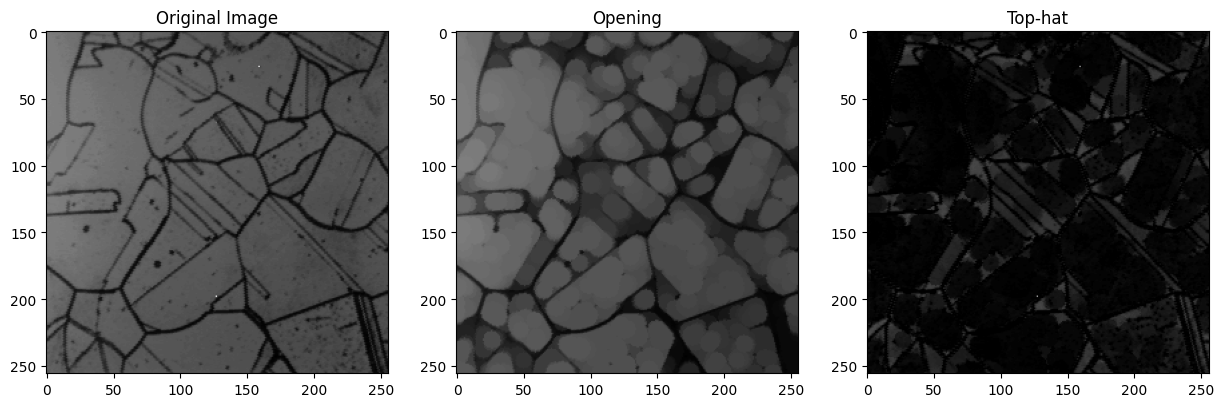

In [6]:
im=skio.imread('Images/laiton.bmp')

fig, axs = plt.subplots(1, 3, figsize = (15, 15))

t=10
#se=strel('line', t, -45)
se = strel('disk', 6)
ch=im-morpho.opening(im,se)

axs[0].imshow(im, cmap="gray", vmin = 0, vmax = 255)
axs[0].set_title('Original Image')

axs[1].imshow(morpho.opening(im, se), cmap="gray", vmin = 0, vmax = 255)
axs[1].set_title('Opening')

axs[2].imshow(ch, cmap="gray", vmin = 0, vmax = 255)
axs[2].set_title('Top-hat')

## Dual

Text(0.5, 1.0, 'Dual Top-hat')

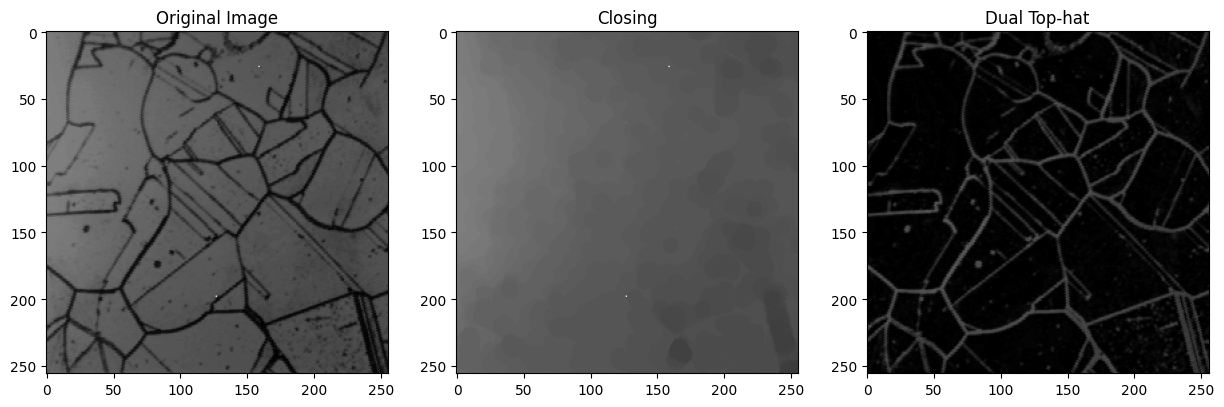

In [7]:
fig, axs = plt.subplots(1, 3, figsize = (15, 15))

t=10
#se=strel('line', t, -45)
se = strel('disk', 6)
ch = morpho.closing(im,se) - im

axs[0].imshow(im, cmap="gray", vmin = 0, vmax = 255)
axs[0].set_title('Original Image')

axs[1].imshow(morpho.closing(im, se), cmap="gray", vmin = 0, vmax = 255)
axs[1].set_title('Closing')

axs[2].imshow(ch, cmap="gray", vmin = 0, vmax = 255)
axs[2].set_title('Dual Top-hat')

## Pointwise maximum

Text(0.5, 1.0, 'Angle: -45, length = 10')

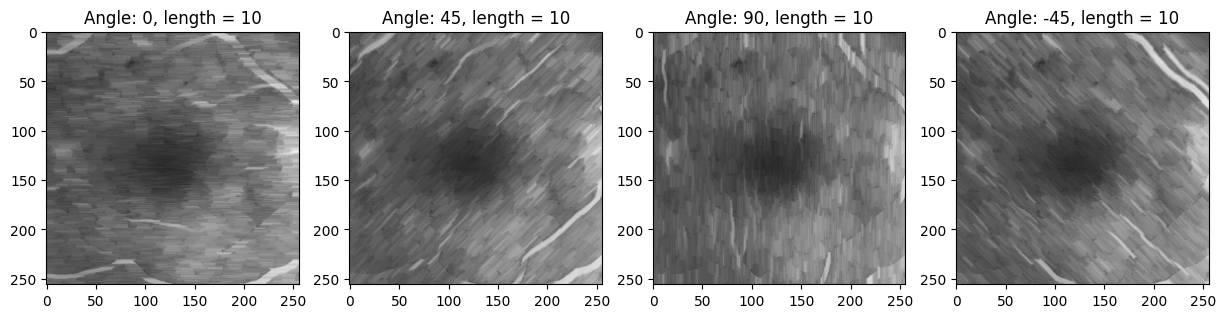

In [8]:
im=skio.imread('Images/retina2.gif')

se1 = strel('line', 10, 0)
se2 = strel('line', 10, 45)
se3 = strel('line', 10, 90)
se4 = strel('line', 10, -45)

opening1 = morpho.opening(im,se1)
opening2 = morpho.opening(im,se2)
opening3 = morpho.opening(im,se3)
opening4 = morpho.opening(im,se4)



point_max = np.zeros(im.shape)

for row in range(im.shape[0]):
    for col in range(im.shape[1]):
        point_max[row, col] = max(opening1[row, col], opening2[row, col], opening3[row, col], opening4[row, col])
        
        
fig, axs = plt.subplots(1, 4, figsize = (15, 5))
axs[0].imshow(opening1, cmap = 'gray', vmin = 0, vmax = 255)
axs[0].set_title("Angle: 0, length = 10")
axs[1].imshow(opening2, cmap = 'gray', vmin = 0, vmax = 255)
axs[1].set_title("Angle: 45, length = 10")
axs[2].imshow(opening3, cmap = 'gray', vmin = 0, vmax = 255)
axs[2].set_title("Angle: 90, length = 10")
axs[3].imshow(opening4, cmap = 'gray', vmin = 0, vmax = 255)
axs[3].set_title("Angle: -45, length = 10")

Text(0.5, 1.0, 'Point-wise maximum')

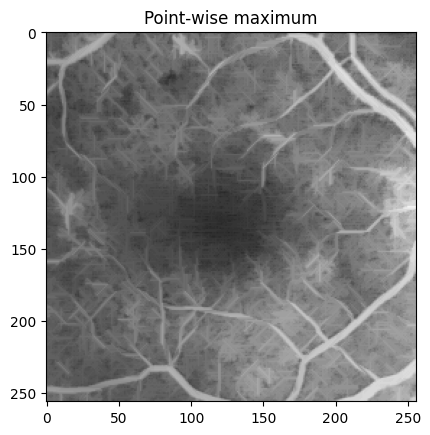

In [9]:
plt.imshow(point_max, cmap = 'gray', vmin = 0, vmax = 255)
plt.title("Point-wise maximum")

In [10]:
"""
t=10
se=strel('line',t,-45)
ch=morpho.closing(im,se) - im
plt.imshow(ch,cmap="gray")
plt.title('Top-hat')
plt.show()
#%%  Alternate sequential filter
#im=skio.imread('Images/retina2.gif')
imt=im.copy()
N=3
for k in range(N):
    se=strel('disk',k)
    imt=morpho.closing(morpho.opening(imt,se),se)
plt.imshow(imt,cmap="gray")
plt.show()


#%% Watersheds
#im=skio.imread('Images/bat200.bmp')
se=morpho.disk(1)

grad=morpho.dilation(im,se)-morpho.erosion(im,se)
grad=np.int32(grad>40)*grad
plt.imshow(grad,cmap="gray")
plt.show()

local_mini = skf.peak_local_max(255-grad, #il n'y a pas de fonction local_min...
                            indices=False)
markers = ndi.label(local_mini)[0]
plt.imshow(local_mini,cmap="gray")
plt.show()

labels = skimage.segmentation.watershed(grad, markers,watershed_line=True)
plt.imshow(couleurs_alea(labels))
plt.show()
# viewimage_color(couleurs_alea(labels)) - Utilisable si gimp est installé

# visualization of the result
segm=labels.copy()
for i in range(segm.shape[0]):
    for j in range(segm.shape[1]):
        if segm[i,j] == 0: 
            segm[i,j]=255
        else:
            segm[i,j]=0
#superimposition of segmentation contours on the original image
contourSup=np.maximum(segm,im)
plt.imshow(contourSup,cmap="gray") 


#%% reconstruction
#im=skio.imread('Images/retina2.gif')
se4=strel('disk',4)
open4=morpho.opening(im,se4)
reco=morpho.reconstruction(open4,im)
plt.imshow(reco,cmap="gray")
#%% FIN  exemples TP MORPHO
"""

'\nt=10\nse=strel(\'line\',t,-45)\nch=morpho.closing(im,se) - im\nplt.imshow(ch,cmap="gray")\nplt.title(\'Top-hat\')\nplt.show()\n#%%  Alternate sequential filter\n#im=skio.imread(\'Images/retina2.gif\')\nimt=im.copy()\nN=3\nfor k in range(N):\n    se=strel(\'disk\',k)\n    imt=morpho.closing(morpho.opening(imt,se),se)\nplt.imshow(imt,cmap="gray")\nplt.show()\n\n\n#%% Watersheds\n#im=skio.imread(\'Images/bat200.bmp\')\nse=morpho.disk(1)\n\ngrad=morpho.dilation(im,se)-morpho.erosion(im,se)\ngrad=np.int32(grad>40)*grad\nplt.imshow(grad,cmap="gray")\nplt.show()\n\nlocal_mini = skf.peak_local_max(255-grad, #il n\'y a pas de fonction local_min...\n                            indices=False)\nmarkers = ndi.label(local_mini)[0]\nplt.imshow(local_mini,cmap="gray")\nplt.show()\n\nlabels = skimage.segmentation.watershed(grad, markers,watershed_line=True)\nplt.imshow(couleurs_alea(labels))\nplt.show()\n# viewimage_color(couleurs_alea(labels)) - Utilisable si gimp est installé\n\n# visualization of

## Alternate sequential filters

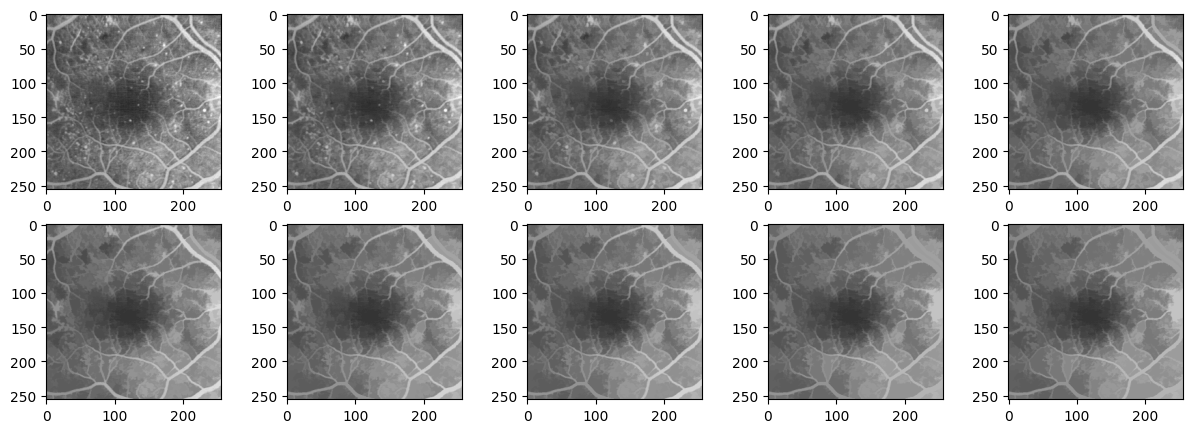

In [11]:
N = 11
r = 2

fig, axs = plt.subplots(2, 5, figsize = (15, 5))

im=skio.imread('Images/retina2.gif')
for i in range(0, 2):
    for j in range(0, 5):
        axs[i, j].imshow(im, cmap = 'gray', vmin = 0, vmax = 255)
        se = strel('square', r)
        opening = morpho.opening(im, se)
        recon1 = morpho.reconstruction(opening, im)
        closing = morpho.closing(recon1, se)
        recon2 = morpho.reconstruction(closing, recon1, 'erosion')
        im = recon2
        r += 1


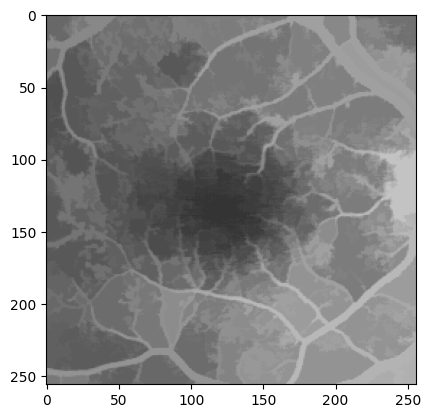

In [12]:
plt.imshow(im, cmap = 'gray', vmin = 0, vmax = 255)

## Reconstruction

Text(0.5, 1.0, 'Reconstruction')

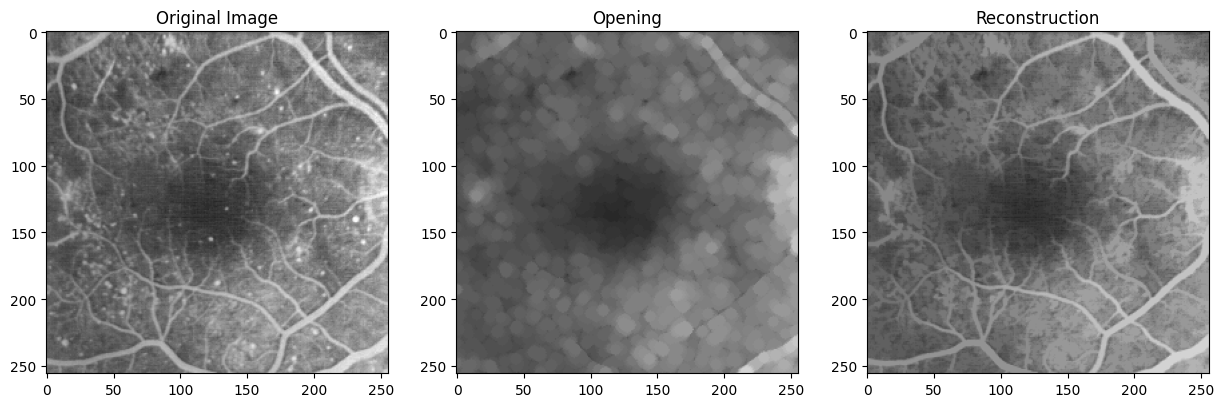

In [13]:
fig, axs = plt.subplots(1, 3, figsize = (15, 5))

im=skio.imread('Images/retina2.gif');
se4 = strel('disk',4);
open4 = morpho.opening(im,se4);
reco=morpho.reconstruction(open4,im);
#dilat = morpho.dilation(open4, se4)

axs[0].imshow(im, cmap = 'gray', vmin = 0, vmax = 255)
axs[0].set_title('Original Image')
axs[1].imshow(open4, cmap = 'gray', vmin = 0, vmax = 255)
axs[1].set_title('Opening')
axs[2].imshow(reco, cmap = 'gray', vmin = 0, vmax = 255)
axs[2].set_title('Reconstruction')

## Segmentation

Text(0.5, 1.0, 'Morphological Gradient')

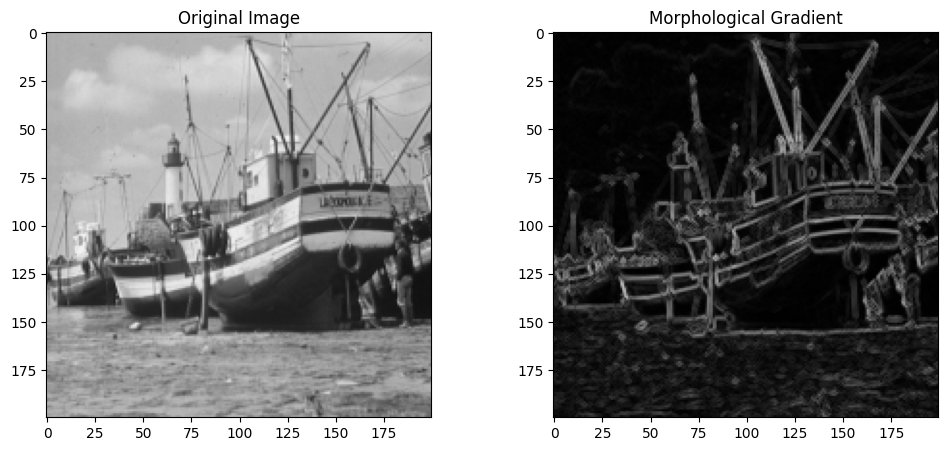

In [17]:
im=skio.imread('Images/bat200.bmp')
se=strel('disk',1)
dil1 = morpho.dilation(im, se)
er1 = morpho.erosion(im, se)
morpho_grad = dil1-er1
fig, axs = plt.subplots(1, 2, figsize = (12, 5))

axs[0].imshow(im, cmap = 'gray', vmin = 0, vmax = 255)
axs[0].set_title('Original Image')
axs[1].imshow(dil1-er1, cmap = 'gray', vmin = 0, vmax = 255)
axs[1].set_title('Morphological Gradient')

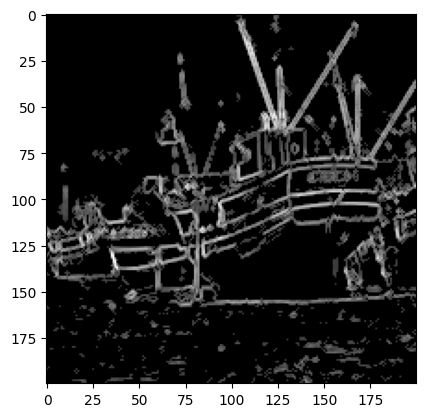

C:\Users\pirio\AppData\Local\Temp\ipykernel_2132\4075802768.py:10: FutureWarning: indices argument is deprecated and will be removed in version 0.20. To avoid this warning, please do not use the indices argument. Please see peak_local_max documentation for more details.
  local_mini = skf.peak_local_max(255-grad, #il n'y a pas de fonction local_min...


[[False False False ... False False False]
 [False  True  True ...  True  True False]
 [False  True  True ...  True  True False]
 ...
 [False  True  True ...  True  True False]
 [False  True  True ...  True  True False]
 [False False False ... False False False]]


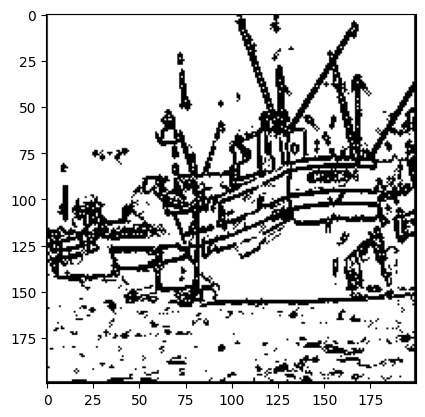

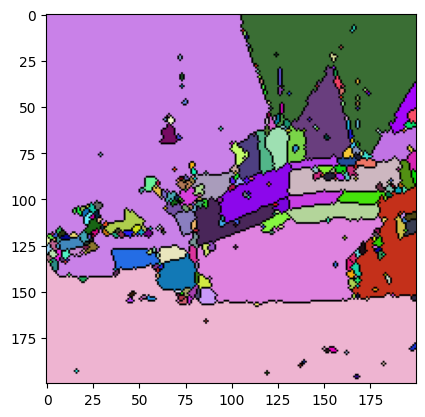

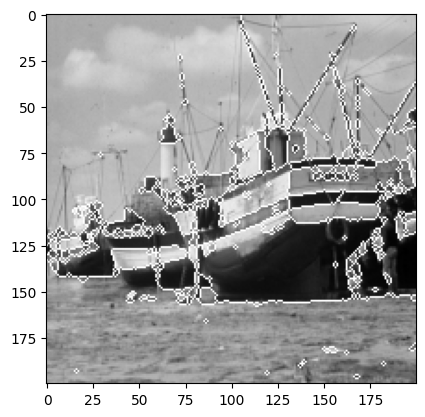

In [20]:
im=skio.imread('Images/bat200.bmp')
se=morpho.disk(1)

        
grad=morpho.dilation(im,se)-morpho.erosion(im,se)
grad=np.int32(grad>40)*grad
plt.imshow(grad,cmap="gray")
plt.show()

local_mini = skf.peak_local_max(255-grad, #il n'y a pas de fonction local_min...
                            indices=False)
print(local_mini)
markers = ndi.label(local_mini)[0]
plt.imshow(local_mini,cmap="gray")
plt.show()

labels = skimage.segmentation.watershed(grad, markers,watershed_line=True)
plt.imshow(couleurs_alea(labels))
plt.show()

# visualization of the result
segm=labels.copy()
for i in range(segm.shape[0]):
    for j in range(segm.shape[1]):
        if segm[i,j] == 0: 
            segm[i,j]=255
        else:
            segm[i,j]=0
#superimposition of segmentation contours on the original image
contourSup=np.maximum(segm,im)
plt.imshow(contourSup,cmap="gray") 

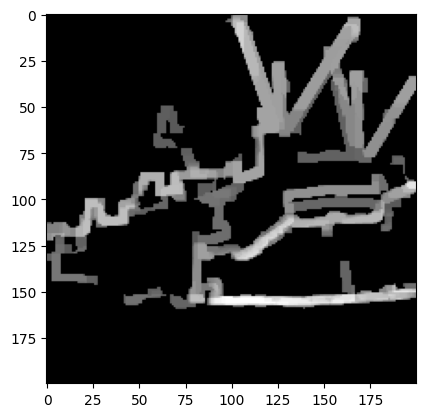

C:\Users\pirio\AppData\Local\Temp\ipykernel_2132\3015989453.py:19: FutureWarning: indices argument is deprecated and will be removed in version 0.20. To avoid this warning, please do not use the indices argument. Please see peak_local_max documentation for more details.
  local_mini = skf.peak_local_max(255-grad, #il n'y a pas de fonction local_min...


[[False False False ... False False False]
 [False  True  True ...  True  True False]
 [False  True  True ...  True  True False]
 ...
 [False  True  True ...  True  True False]
 [False  True  True ...  True  True False]
 [False False False ... False False False]]


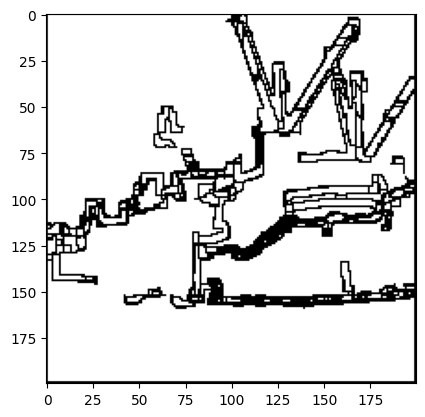

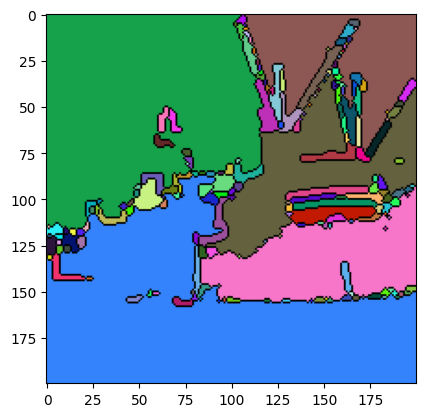

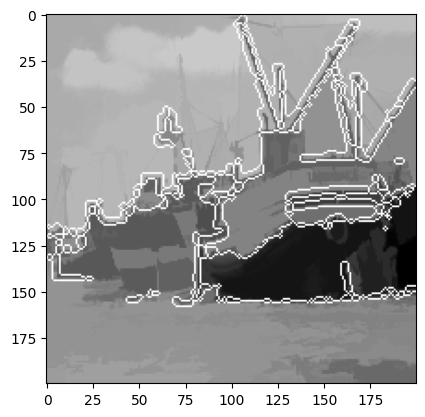

In [25]:
im=skio.imread('Images/bat200.bmp')
se=morpho.disk(1)
r = 1
for i in range(0, 6):
    se = strel('square', r)
    opening = morpho.opening(im, se)
    #recon1 = morpho.reconstruction(opening, im)
    closing = morpho.closing(recon1, se)
    #recon2 = morpho.reconstruction(closing, recon1, 'erosion')
    fas = recon2
    im = fas
    r += 1
        
grad=morpho.dilation(im,se)-morpho.erosion(im,se)
grad=np.int32(grad>40)*grad
plt.imshow(grad,cmap="gray")
plt.show()

local_mini = skf.peak_local_max(255-grad, #il n'y a pas de fonction local_min...
                            indices=False)
print(local_mini)
markers = ndi.label(local_mini)[0]
plt.imshow(local_mini,cmap="gray")
plt.show()

labels = skimage.segmentation.watershed(grad, markers,watershed_line=True)
plt.imshow(couleurs_alea(labels))
plt.show()

# visualization of the result
segm=labels.copy()
for i in range(segm.shape[0]):
    for j in range(segm.shape[1]):
        if segm[i,j] == 0: 
            segm[i,j]=255
        else:
            segm[i,j]=0
#superimposition of segmentation contours on the original image
contourSup=np.maximum(segm,im)
plt.imshow(contourSup,cmap="gray") 

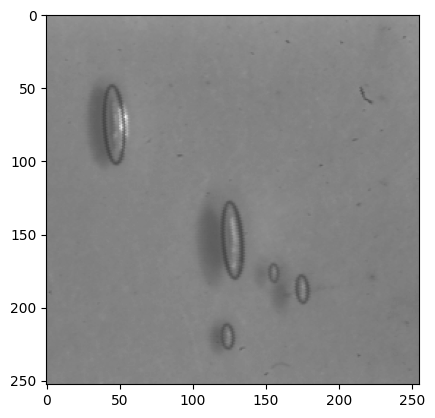

In [26]:
im=skio.imread('Images/bulles.bmp')
plt.imshow(im,cmap="gray")
plt.show()

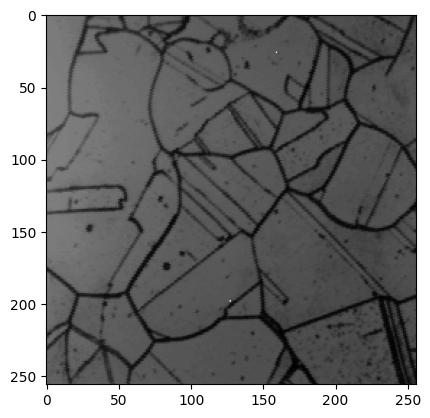

In [27]:
im=skio.imread('Images/laiton.bmp')
plt.imshow(im,cmap="gray")
plt.show()